# Morphological Operations

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [6]:
!ls ../images

background.jpg	cat-image.jpg  current.jpg  image-1.png  kernel-indexing.png


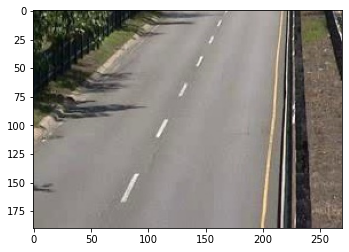

In [7]:
background_img = cv.imread("../images/background.jpg")
plt.imshow(background_img[:,:,::-1])

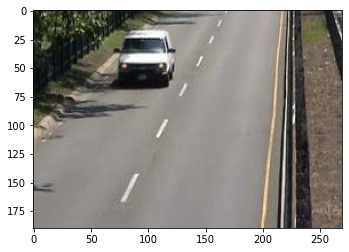

In [8]:
current_img = cv.imread("../images/current.jpg")
plt.imshow(current_img[:,:,::-1])

In [9]:
background_gray = cv.cvtColor(background_img, cv.COLOR_BGR2GRAY)

In [10]:
current_gray = cv.cvtColor(current_img, cv.COLOR_BGR2GRAY)

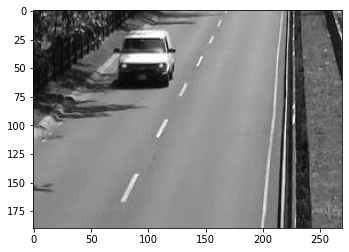

In [12]:
plt.imshow(current_gray, cmap="gray")

In [13]:
diff_gray = current_gray - background_gray

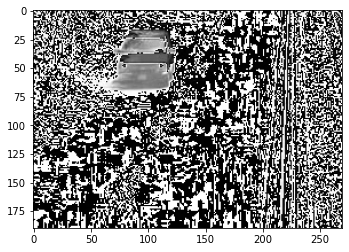

In [14]:
plt.imshow(diff_gray, cmap="gray")

In [15]:
_, binary_img = cv.threshold(diff_gray, 10, 1, cv.THRESH_BINARY)

In [16]:
binary_img

array([[1, 1, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

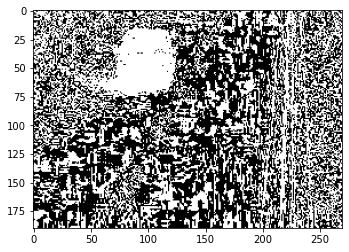

In [17]:
plt.imshow(binary_img, cmap="gray")

In [18]:
cross_kernel = np.array([[0, 1, 0],
                         [1, 1, 1],
                         [0, 1, 0]])

In [35]:
cross_kernel_2 = cv.getStructuringElement(cv.MORPH_RECT, (5,5))

In [36]:
cross_kernel_2

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [37]:
output_binary = cv.erode(binary_img, cross_kernel_2)

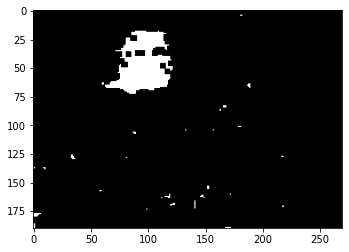

In [38]:
plt.imshow(output_binary, cmap="gray")

In [39]:
output_binary = binary_img.copy()

for i in range(3):
    output_binary = cv.erode(output_binary, cross_kernel_2)

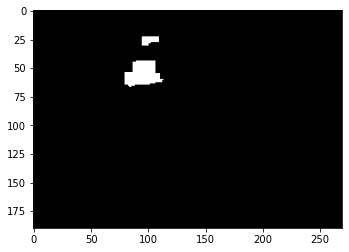

In [40]:
plt.imshow(output_binary, cmap="gray")

In [41]:
for i in range(3):
    output_binary = cv.dilate(output_binary, cross_kernel_2)

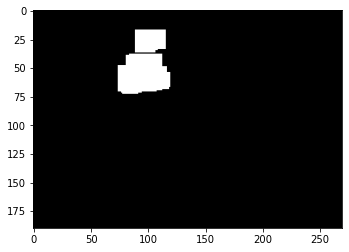

In [42]:
plt.imshow(output_binary, cmap="gray")

In [43]:
contours, hierarchy = cv.findContours(output_binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

In [44]:
len(contours)

2

In [45]:
for i in range(len(contours)):
    boundRect = cv.boundingRect(contours[i])
    cv.rectangle(current_img, boundRect, (0, 0, 255), 1)

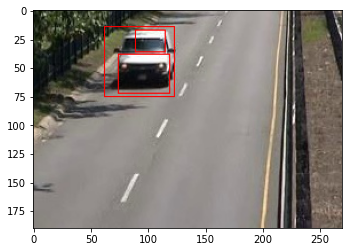

In [46]:
plt.imshow(current_img[:,:,::-1])